In [1]:
import xlwings as xw
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit, fmin
from sklearn.metrics import r2_score

In [2]:
path_to_excel_file = os.path.join('banking_strategy.xlsx')
wb = xw.Book(path_to_excel_file)
print(wb.name)
print(wb.sheets)
sht1 = wb.sheets[0]
print(sht1.name)

banking_strategy.xlsx
Sheets([<Sheet [banking_strategy.xlsx]Sheet1>, <Sheet [banking_strategy.xlsx]Sheet2>])
Sheet1


[60.69047619 56.28571429 53.78571429 53.19047619 54.5        57.71428571
 62.83333333]


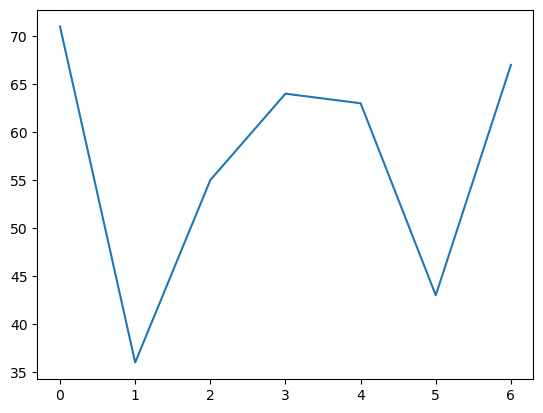

In [3]:
officers_rate = np.array(sht1.range('B4:H8').value)
lin = LinearRegression()
X = np.array([1,2,3,4,5,6,7]).reshape(-1, 1)
Y = officers_rate.T[:,1]
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)
lin.fit(X, Y)

print(lin.predict(X))
plt.plot(officers_rate.T[:,1])

In [4]:
sht2 = wb.sheets[1]
contracts_count = np.array(sht2.range('B23:B34').value)
profit = np.array(sht2.range('E23:E34').value)
def reg_func(x, a, b):
    y = a * x**2 + b * x
    return y
popt, pcov = curve_fit(reg_func, xdata=contracts_count, ydata=profit)
profit_pred = reg_func(contracts_count, *popt)
print(profit_pred)
print(f'Коэффициент детерминации R^2: {r2_score(profit, profit_pred)}')
sht2.range('G23:G34').value = profit_pred.reshape(-1,1)

[172771.33452065 178444.66724583 174488.78930898 173654.9887154
 177014.49427728 175646.01469715 178444.66724583 178929.4926312
 175646.01469715 179153.21022344 176355.1812878  177325.45567157]
Коэффициент детерминации R^2: 0.6755645971248794


In [5]:
contracts_optimal = fmin(lambda x: -reg_func(x, a=popt[0], b=popt[1]), 0)
profit_max = reg_func(contracts_optimal, popt[0], popt[1])
print(f'Максимальная прибыль {profit_max} достигается при оптимальном числе контрактов {contracts_optimal}')


Optimization terminated successfully.
         Current function value: -181050.770767
         Iterations: 40
         Function evaluations: 80
Максимальная прибыль [181050.77076666] достигается при оптимальном числе контрактов [170.4499375]
